<a href="https://colab.research.google.com/github/ImajiPietersz/FYP/blob/main/GAN_Experiments/GAN_Experiment_Combine_CWRU_Data_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hashaninimeshika","key":"95beb196deca7c93b02c84e31a9057d8"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#change the permission
!chmod 600  ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d brjapon/cwru-bearing-datasets

 64% 26.0M/40.4M [00:00<00:00, 87.9MB/s]
100% 40.4M/40.4M [00:00<00:00, 107MB/s] 


In [5]:
from zipfile import ZipFile
file_name = "/content/cwru-bearing-datasets.zip"

with ZipFile(file_name, 'r') as zip1:
  zip1.extractall()
  print('Done')

Done


In [6]:
import matplotlib.pyplot as plt
import scipy.io
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras import layers


In [7]:
import matplotlib.pyplot as plt


In [8]:
df = pd.read_csv('/content/feature_time_48k_2048_load_1.csv')

In [ ]:
df

,max,min,mean,sd,rms,skewness,kurtosis,crest,form,fault
0,0.35986,-0.41890,0.017840,0.122746,0.124006,-0.118571,-0.042219,2.901946,6.950855,Ball_007_1
1,0.46772,-0.36111,0.022255,0.132488,0.134312,0.174699,-0.081548,3.482334,6.035202,Ball_007_1
2,0.46855,-0.43809,0.020470,0.149651,0.151008,0.040339,-0.274069,3.102819,7.376926,Ball_007_1
3,0.58475,-0.54303,0.020960,0.157067,0.158422,-0.023266,0.134692,3.691097,7.558387,Ball_007_1
4,0.44685,-0.57891,0.022167,0.138189,0.139922,-0.081534,0.402783,3.193561,6.312085,Ball_007_1
...,...,...,...,...,...,...,...,...,...,...
2295,0.21425,-0.19839,0.010769,0.064100,0.064983,-0.212497,-0.119312,3.297037,6.034174,Normal_1
2296,0.21967,-0.20882,0.013136,0.068654,0.069883,-0.061308,-0.295122,3.143410,5.319958,Normal_1
2297,0.20799,-0.21613,0.012571,0.067128,0.068279,-0.154754,-0.071405,3.046161,5.431299,Normal_1
2298,0.21425,-0.22405,0.012608,0.066813,0.067977,-0.326966,0.023662,3.151821,5.391672,Normal_1


# **Pure Data**

In [9]:
df = df.drop('fault', axis=1)


In [ ]:
df

,max,min,mean,sd,rms,skewness,kurtosis,crest,form
0,0.35986,-0.41890,0.017840,0.122746,0.124006,-0.118571,-0.042219,2.901946,6.950855
1,0.46772,-0.36111,0.022255,0.132488,0.134312,0.174699,-0.081548,3.482334,6.035202
2,0.46855,-0.43809,0.020470,0.149651,0.151008,0.040339,-0.274069,3.102819,7.376926
3,0.58475,-0.54303,0.020960,0.157067,0.158422,-0.023266,0.134692,3.691097,7.558387
4,0.44685,-0.57891,0.022167,0.138189,0.139922,-0.081534,0.402783,3.193561,6.312085
...,...,...,...,...,...,...,...,...,...
2295,0.21425,-0.19839,0.010769,0.064100,0.064983,-0.212497,-0.119312,3.297037,6.034174
2296,0.21967,-0.20882,0.013136,0.068654,0.069883,-0.061308,-0.295122,3.143410,5.319958
2297,0.20799,-0.21613,0.012571,0.067128,0.068279,-0.154754,-0.071405,3.046161,5.431299
2298,0.21425,-0.22405,0.012608,0.066813,0.067977,-0.326966,0.023662,3.151821,5.391672


In [10]:
# x is my training data
# mu is the mean
# std is the standard deviation
mu=0.0
std = 0.1
def gaussian_noise(x,mu,std):
    noise = np.random.normal(mu, std, size = x.shape)
    x_noisy = x + noise
    return x_noisy 

## **Noisy Data**

In [11]:
noisy_df = gaussian_noise(df, mu,std)

In [ ]:
noisy_df

,max,min,mean,sd,rms,skewness,kurtosis,crest,form
0,0.263836,-0.478999,-0.042838,0.043245,0.136456,0.037292,0.093812,2.834705,6.864180
1,0.422624,-0.286640,-0.016287,0.080336,0.187154,0.187123,-0.064027,3.442941,6.049140
2,0.470606,-0.371190,0.107685,0.185612,0.232907,-0.152294,-0.341667,2.834683,7.497701
3,0.531773,-0.510455,0.172765,0.220894,0.243183,0.076096,0.048936,3.889300,7.530898
4,0.415350,-0.628555,0.086770,0.203597,0.027631,-0.129284,0.402958,3.407143,6.196283
...,...,...,...,...,...,...,...,...,...
2295,0.184770,-0.042932,-0.092312,0.046852,0.038037,-0.049933,-0.261233,3.106585,6.208353
2296,0.250016,-0.149327,-0.022638,0.186008,0.111087,0.019303,-0.094967,3.079813,5.299444
2297,0.234301,-0.105892,0.095015,0.063754,-0.115735,-0.102153,0.079649,3.070856,5.574455
2298,0.204560,-0.212005,-0.035760,0.031381,0.348608,-0.268030,-0.011538,3.167333,5.360949


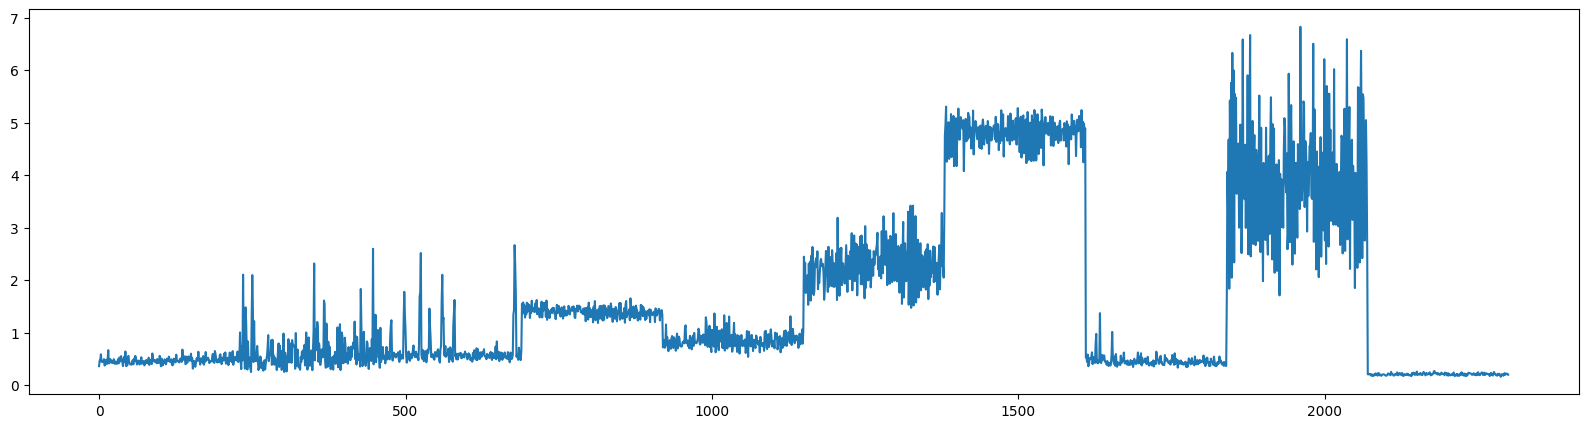

In [ ]:
plt.figure(figsize=(20,5)) 
plt.plot(df['max'])
plt.show()


In [12]:
# 1- pure
#0 - noisy

df = df.assign(target=1)
df = df.assign(target2 = 0)

In [ ]:
df.head()

,max,min,mean,sd,rms,skewness,kurtosis,crest,form,target,target2
0,0.35986,-0.41890,0.017840,0.122746,0.124006,-0.118571,-0.042219,2.901946,6.950855,1,0
1,0.46772,-0.36111,0.022255,0.132488,0.134312,0.174699,-0.081548,3.482334,6.035202,1,0
2,0.46855,-0.43809,0.020470,0.149651,0.151008,0.040339,-0.274069,3.102819,7.376926,1,0
3,0.58475,-0.54303,0.020960,0.157067,0.158422,-0.023266,0.134692,3.691097,7.558387,1,0
4,0.44685,-0.57891,0.022167,0.138189,0.139922,-0.081534,0.402783,3.193561,6.312085,1,0


In [ ]:
df.dtypes

max         float64
min         float64
mean        float64
sd          float64
rms         float64
skewness    float64
kurtosis    float64
crest       float64
form        float64
target        int64
dtype: object

In [13]:
noisy_df = noisy_df.assign(target=0)
noisy_df = noisy_df.assign(target2=1)

In [ ]:
noisy_df.head()

,max,min,mean,sd,rms,skewness,kurtosis,crest,form,target,target2
0,0.515457,-0.309107,-0.091536,0.025367,0.152524,-0.169818,-0.272364,3.031527,6.758846,0,1
1,0.440194,-0.183652,0.033640,0.121355,0.028411,0.267097,0.004125,3.529901,6.050401,0,1
2,0.630763,-0.398699,-0.025985,0.320589,0.169417,0.065645,-0.226476,3.098511,7.285837,0,1
3,0.583676,-0.311749,0.090544,0.137420,0.301507,0.049784,0.068556,3.843714,7.285962,0,1
4,0.421946,-0.620416,0.096275,0.251140,0.179703,0.079783,0.434899,3.229799,6.094601,0,1


In [14]:
from pandas.core.algorithms import IndexLabel
Mixed_set=pd.DataFrame()
Mixed_set = pd.concat([df,noisy_df ], axis=0)
Mixed_set = Mixed_set.reset_index(drop=True)
Mixed_set.head(6)

,max,min,mean,sd,rms,skewness,kurtosis,crest,form,target,target2
0,0.35986,-0.41890,0.017840,0.122746,0.124006,-0.118571,-0.042219,2.901946,6.950855,1,0
1,0.46772,-0.36111,0.022255,0.132488,0.134312,0.174699,-0.081548,3.482334,6.035202,1,0
2,0.46855,-0.43809,0.020470,0.149651,0.151008,0.040339,-0.274069,3.102819,7.376926,1,0
3,0.58475,-0.54303,0.020960,0.157067,0.158422,-0.023266,0.134692,3.691097,7.558387,1,0
4,0.44685,-0.57891,0.022167,0.138189,0.139922,-0.081534,0.402783,3.193561,6.312085,1,0
5,0.43726,-0.44435,0.021119,0.138763,0.140328,-0.131329,-0.168557,3.115990,6.644538,1,0


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Mixed_set = pd.DataFrame(scaler.fit_transform(Mixed_set.values), columns=Mixed_set.columns)
Mixed_set

,max,min,mean,sd,rms,skewness,kurtosis,crest,form,target,target2
0,0.061383,0.917786,0.523123,0.212812,0.225640,0.464643,0.024418,0.087848,0.011173,1.0,0.0
1,0.076980,0.926816,0.529587,0.219271,0.232179,0.595641,0.023157,0.177280,0.008221,1.0,0.0
2,0.077100,0.914787,0.526974,0.230650,0.242774,0.535625,0.016984,0.118801,0.012546,1.0,0.0
3,0.093903,0.898390,0.527690,0.235568,0.247478,0.507214,0.030090,0.209448,0.013131,1.0,0.0
4,0.073962,0.892784,0.529459,0.223051,0.235739,0.481187,0.038686,0.132783,0.009114,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4595,0.041057,0.964026,0.520929,0.178682,0.231031,0.409246,0.024393,0.133775,0.008281,0.0,1.0
4596,0.031325,0.931885,0.816362,0.248703,0.189275,0.550299,0.014625,0.137751,0.006044,0.0,1.0
4597,0.066417,0.947595,0.493086,0.261612,0.272322,0.394946,0.022301,0.108052,0.006648,0.0,1.0
4598,0.019693,0.979205,0.540040,0.142630,0.184732,0.368884,0.027574,0.116027,0.006221,0.0,1.0


In [16]:
from sklearn.model_selection import train_test_split
frames = Mixed_set[['max', 'min','mean','sd', 'rms', 'skewness', 'kurtosis', 'crest', 'form']].values
labels = Mixed_set[['target', 'target2']].values
train_data,test_data, train_labels, test_labels =  train_test_split(frames, labels,train_size=0.7, random_state=42 )
print(len(train_data))
print(len(test_data))
print(len(train_labels))
print(len(test_labels))

3220
1380
3220
1380


In [17]:
def plotUsingAutoEncoder(model,df):

  denoised_all = []

  for _,frame in df.iterrows():
    row_array = frame.values[:9]
    encoded_data = model.encoder(np.array([row_array])).numpy()
    [values] = model.decoder(encoded_data).numpy()
    denoised_all.append(values)
  separated_max = [x[0] for x in denoised_all]
  separated_min = [x[1] for x in denoised_all]
  separated_mean = [x[2] for x in denoised_all]
  separated_sd = [x[3] for x in denoised_all]
  separated_rms = [x[4] for x in denoised_all]
  separated_skewness = [x[5] for x in denoised_all]
  separated_kurtosis = [x[6] for x in denoised_all]
  separated_crest = [x[7] for x in denoised_all]
  separated_form = [x[8] for x in denoised_all]
  
  
  df['separated_max'] = pd.DataFrame(separated_max, columns=['separated_max']) 
  df['separated_min'] = pd.DataFrame(separated_min, columns=['separated_min'])
  df['separated_mean'] = pd.DataFrame(separated_mean, columns=['separated_mean']) 
  df['separated_sd'] = pd.DataFrame(separated_sd, columns=['separated_sd']) 
  df['separated_rms'] = pd.DataFrame(separated_rms, columns=['separated_rms']) 
  df['separated_skewness'] = pd.DataFrame(separated_skewness, columns=['separated_skewness']) 
  df['separated_kurtosis'] = pd.DataFrame(separated_kurtosis, columns=['separated_kurtosis']) 
  df['separated_crest'] = pd.DataFrame(separated_crest, columns=['separated_crest']) 
  df['separated_form'] = pd.DataFrame(separated_form, columns=['separated_form'])
 
   
  scaler.fit(df.values)
  df = pd.DataFrame(scaler.inverse_transform(df.values), columns=df.columns)
  noise = df[['rms']].values.flatten()
  seperated = df[['separated_rms']].values.flatten()

  plt.figure(figsize=(20,5)) 
  plt.plot(noise)
  plt.plot(seperated, color="red")
  plt.legend(labels=["Input", "Reconstruction" ])
  plt.show()

#*_With 1D 2 CNN Layers & 1 Dense Layer - Leaky ReLU activation function_*



In [ ]:
from keras.layers.activation.leaky_relu import LeakyReLU
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

class Discriminator(Model):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(9,)),
        tf.keras.layers.Reshape((9, 1)),  # Add a Reshape layer to prepare input for Conv1D
        tf.keras.layers.Conv1D(filters=9, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
        tf.keras.layers.Conv1D(filters=4, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer 
        tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
        tf.keras.layers.Dense(2,activation='softmax')
    ])

  def call(self, x):
    return self.model(x)

class Generator(Model):
  def __init__(self):
    super(Generator, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Reshape((9, 1)),  # Add a Reshape layer to prepare input for Conv1D
      tf.keras.layers.Conv1D(filters=9, kernel_size=3, activation="LeakyReLU"), 
      tf.keras.layers.Conv1D(filters=4, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
      tf.keras.layers.Flatten(), 
      tf.keras.layers.Dense(2, activation="LeakyReLU")
      ])
    

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(2, activation="LeakyReLU"),
      tf.keras.layers.Dense(4, activation="LeakyReLU"),
      tf.keras.layers.Dense(6, activation="LeakyReLU"),
      tf.keras.layers.Dense(9, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

generator = Generator()
discriminator = Discriminator()

generator.compile(optimizer='adam',loss = 'mae')
discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

discriminator.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = discriminator.fit(train_data, train_labels, epochs=300, validation_data=(test_data, test_labels))

Epoch 1/300
101/101 [==============================] - 2s 8ms/step - loss: 0.6961 - accuracy: 0.5298 - val_loss: 0.6922 - val_accuracy: 0.6630
Epoch 2/300
101/101 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5503 - val_loss: 0.6930 - val_accuracy: 0.4616
Epoch 3/300
101/101 [==============================] - 0s 3ms/step - loss: 0.6920 - accuracy: 0.5270 - val_loss: 0.6910 - val_accuracy: 0.4928
Epoch 4/300
101/101 [==============================] - 0s 3ms/step - loss: 0.6908 - accuracy: 0.5898 - val_loss: 0.6909 - val_accuracy: 0.4674
Epoch 5/300
101/101 [==============================] - 0s 3ms/step - loss: 0.6894 - accuracy: 0.5475 - val_loss: 0.6898 - val_accuracy: 0.4739
Epoch 6/300
101/101 [==============================] - 0s 3ms/step - loss: 0.6869 - accuracy: 0.5342 - val_loss: 0.6844 - val_accuracy: 0.7188
Epoch 7/300
101/101 [==============================] - 0s 3ms/step - loss: 0.6830 - accuracy: 0.5885 - val_loss: 0.6787 - val_accuracy: 0.7333

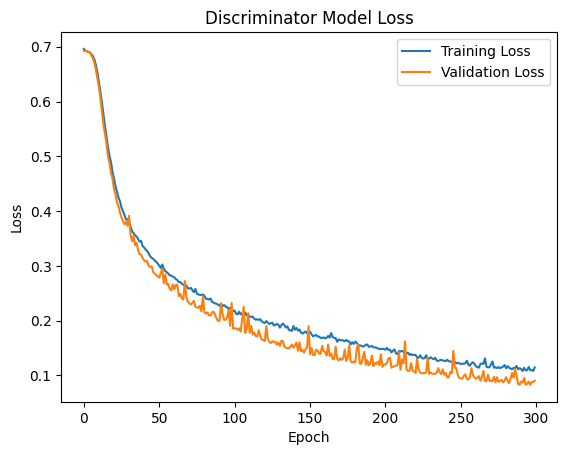

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Discriminator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
max_epochs = 4
learning_rate = 0.001
generator_optimizer = tf.optimizers.Adam(learning_rate)

Epoch 0 Starting
Epoch 0 DONE
Epoch 1 Starting
Epoch 1 DONE
Epoch 2 Starting
Epoch 2 DONE
Epoch 3 Starting
Epoch 3 DONE


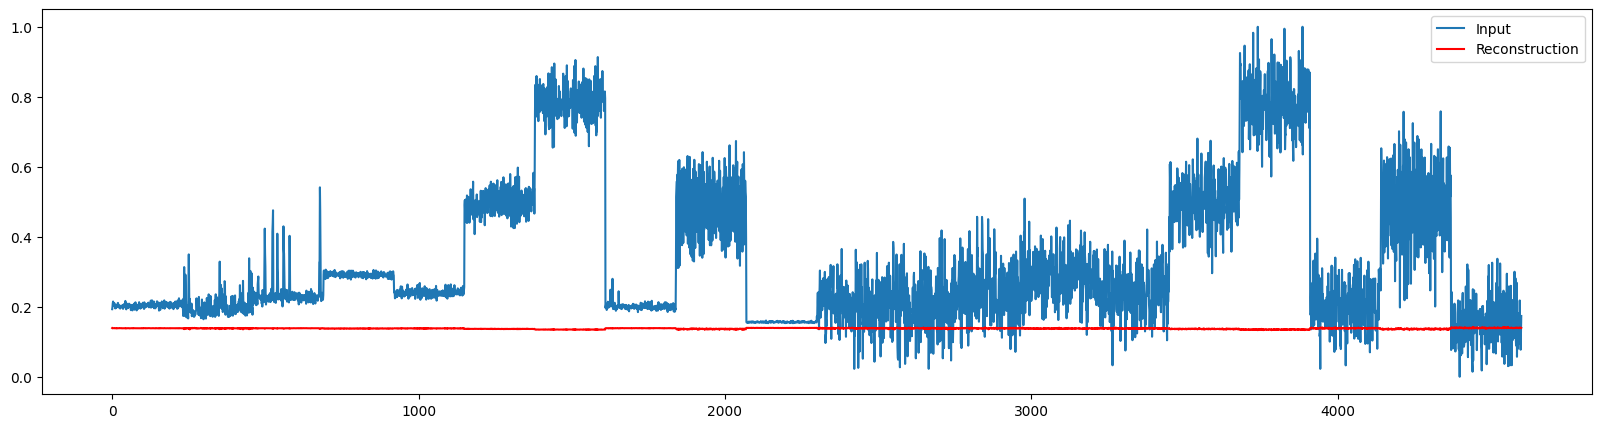

In [ ]:
step = 0
gen_losses = []
for epoch in range(max_epochs):
  print("Epoch " + str(epoch) +" Starting")

  for i in range (len(train_labels)):
    with tf.GradientTape() as gen_tape:
      output = generator(np.array([train_data[i]]))
      disc_output = discriminator(np.array(output))
      mae = tf.keras.losses.MeanAbsoluteError()
      gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
  gen_losses.append(gen_loss)
  
  print("Epoch " + str(epoch) +" DONE")

plotUsingAutoEncoder(generator,Mixed_set)

4


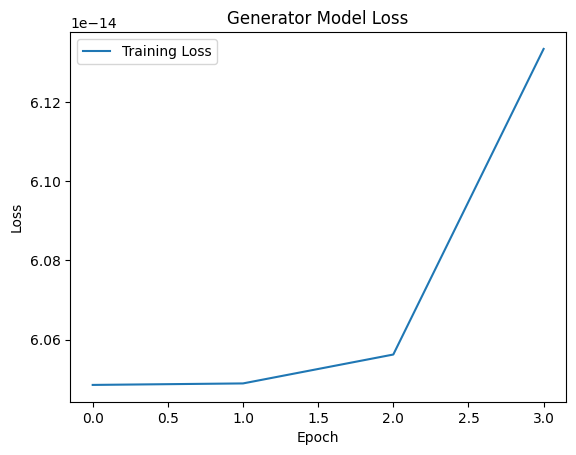

In [ ]:
plt.plot(gen_losses, label='Training Loss')
plt.title('Generator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
print(len(gen_losses))

In [ ]:
#Calculate SNR Value

noise =[]
generated = Mixed_set['separated_rms'][2300:].values.tolist()   #generated signal
original = Mixed_set['rms'][:2300].values.tolist() #original signal
mixed = Mixed_set['rms'][2300:].values.tolist() # with noise
length = len(original)
for i in range(length):
  noise.append(original[i] - mixed[i])

snr = 10 * np.log10(np.mean(np.square(generated))/np.mean(np.square(noise)))
print(snr)

8.572200186825969


#*__With 1D 2 CNN Layers & 1 Dense Layer - Leaky ReLU activation function__*



In [ ]:
from keras.layers.activation.leaky_relu import LeakyReLU
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

class Discriminator(Model):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(9,)),
        tf.keras.layers.Reshape((9, 1)),  # Add a Reshape layer to prepare input for Conv1D
        tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
        tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer
        tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
        tf.keras.layers.Dense(2,activation='softmax')
    ])

  def call(self, x):
    return self.model(x)

class Generator(Model):
  def __init__(self):
    super(Generator, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Reshape((9, 1)),  # Add a Reshape layer to prepare input for Conv1D
      tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation="LeakyReLU"), 
      tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
      tf.keras.layers.Flatten(), 
      tf.keras.layers.Dense(2, activation="LeakyReLU")
      ])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(2, activation="LeakyReLU"),
      tf.keras.layers.Dense(8, activation="LeakyReLU"),
      tf.keras.layers.Dense(9, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

generator = Generator()
discriminator = Discriminator()

generator.compile(optimizer='adam',loss = 'mae')
discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

discriminator.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = discriminator.fit(train_data, train_labels, epochs=300, validation_data=(test_data, test_labels))


Epoch 1/300
101/101 [==============================] - 1s 4ms/step - loss: 0.6928 - accuracy: 0.4966 - val_loss: 0.6930 - val_accuracy: 0.4536
Epoch 2/300
101/101 [==============================] - 0s 3ms/step - loss: 0.6908 - accuracy: 0.5326 - val_loss: 0.6910 - val_accuracy: 0.4935
Epoch 3/300
101/101 [==============================] - 0s 3ms/step - loss: 0.6883 - accuracy: 0.5348 - val_loss: 0.6863 - val_accuracy: 0.6514
Epoch 4/300
101/101 [==============================] - 0s 3ms/step - loss: 0.6839 - accuracy: 0.6764 - val_loss: 0.6812 - val_accuracy: 0.6609
Epoch 5/300
101/101 [==============================] - 0s 3ms/step - loss: 0.6767 - accuracy: 0.6649 - val_loss: 0.6711 - val_accuracy: 0.7732
Epoch 6/300
101/101 [==============================] - 0s 3ms/step - loss: 0.6657 - accuracy: 0.7093 - val_loss: 0.6545 - val_accuracy: 0.7464
Epoch 7/300
101/101 [==============================] - 0s 3ms/step - loss: 0.6487 - accuracy: 0.7236 - val_loss: 0.6336 - val_accuracy: 0.8029

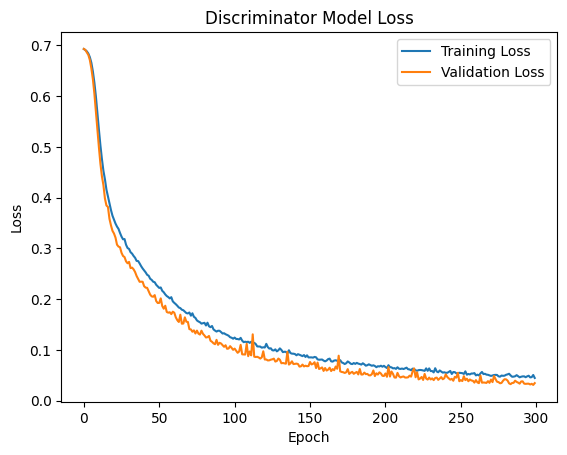

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Discriminator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
max_epochs = 4
learning_rate = 0.001
generator_optimizer = tf.optimizers.Adam(learning_rate)

Epoch 0 Starting
Epoch 0 DONE
Epoch 1 Starting
Epoch 1 DONE
Epoch 2 Starting
Epoch 2 DONE
Epoch 3 Starting
Epoch 3 DONE


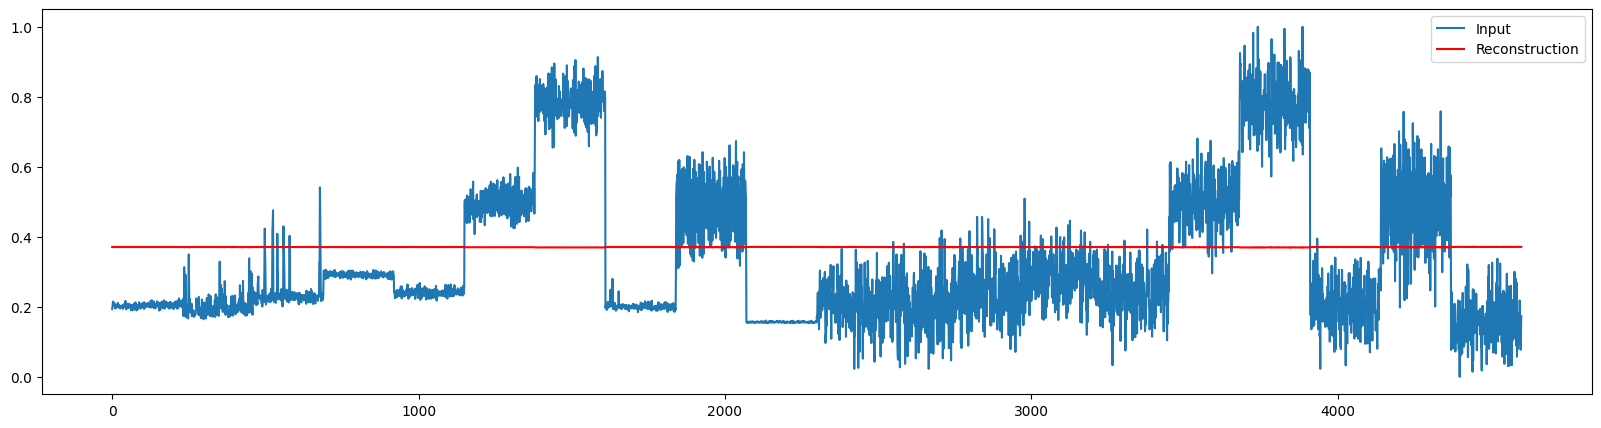

In [ ]:
step = 0
gen_losses = []
for epoch in range(max_epochs):
  print("Epoch " + str(epoch) +" Starting")

  for i in range (len(train_labels)):
    with tf.GradientTape() as gen_tape:
      output = generator(np.array([train_data[i]]))
      disc_output = discriminator(np.array(output))
      mae = tf.keras.losses.MeanAbsoluteError()
      gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
  gen_losses.append(gen_loss)
  
  print("Epoch " + str(epoch) +" DONE")

plotUsingAutoEncoder(generator,Mixed_set)

4


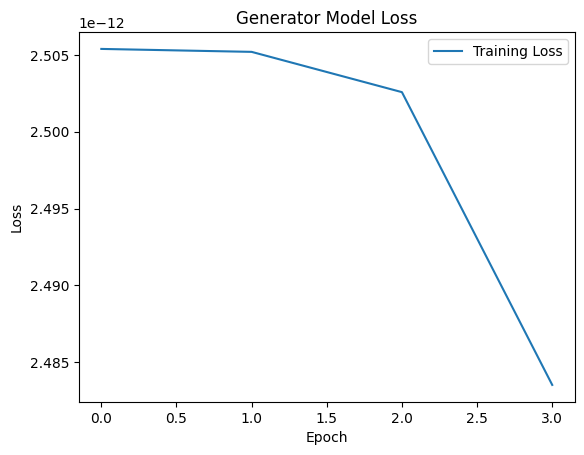

In [ ]:
plt.plot(gen_losses, label='Training Loss')
plt.title('Generator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
print(len(gen_losses))

In [ ]:
#Calculate SNR Value

noise =[]
generated = Mixed_set['separated_rms'][2300:].values.tolist()   #generated signal
original = Mixed_set['rms'][:2300].values.tolist() #original signal
mixed = Mixed_set['rms'][2300:].values.tolist() # with noise
length = len(original)
for i in range(length):
  noise.append(original[i] - mixed[i])

snr = 10 * np.log10(np.mean(np.square(generated))/np.mean(np.square(noise)))
print(snr)

15.492125310935075


#*_With 1D 2 CNN Layers & 2 Dense Layer - Leaky ReLU activation function_*



In [ ]:
from keras.layers.activation.leaky_relu import LeakyReLU
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

class Discriminator(Model):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(9,)),
        tf.keras.layers.Reshape((9, 1)),  # Add a Reshape layer to prepare input for Conv1D
        tf.keras.layers.Conv1D(filters=9, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
        tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer 
        tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
        tf.keras.layers.Dense(6,activation='LeakyReLU'),
        tf.keras.layers.Dense(2,activation='softmax'),
    ])

  def call(self, x):
    return self.model(x)

class Generator(Model):
  def __init__(self):
    super(Generator, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Reshape((9, 1)),  # Add a Reshape layer to prepare input for Conv1D
      tf.keras.layers.Conv1D(filters=9, kernel_size=3, activation="LeakyReLU"), 
      tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
      tf.keras.layers.Flatten(), 
      tf.keras.layers.Dense(6, activation="LeakyReLU"),
      tf.keras.layers.Dense(2, activation="LeakyReLU")
      ])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(2, activation="LeakyReLU"),
      tf.keras.layers.Dense(6, activation="LeakyReLU"),
      tf.keras.layers.Dense(8, activation="LeakyReLU"),
      tf.keras.layers.Dense(9, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

generator = Generator()
discriminator = Discriminator()

generator.compile(optimizer='adam',loss = 'mae')
discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

discriminator.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = discriminator.fit(train_data, train_labels, epochs=300, validation_data=(test_data, test_labels))


Epoch 1/300
101/101 [==============================] - 1s 5ms/step - loss: 0.6935 - accuracy: 0.4807 - val_loss: 0.6929 - val_accuracy: 0.3833
Epoch 2/300
101/101 [==============================] - 0s 3ms/step - loss: 0.6920 - accuracy: 0.4295 - val_loss: 0.6914 - val_accuracy: 0.3841
Epoch 3/300
101/101 [==============================] - 0s 5ms/step - loss: 0.6892 - accuracy: 0.4342 - val_loss: 0.6871 - val_accuracy: 0.3181
Epoch 4/300
101/101 [==============================] - 0s 4ms/step - loss: 0.6813 - accuracy: 0.5127 - val_loss: 0.6758 - val_accuracy: 0.4536
Epoch 5/300
101/101 [==============================] - 0s 4ms/step - loss: 0.6645 - accuracy: 0.5630 - val_loss: 0.6553 - val_accuracy: 0.6304
Epoch 6/300
101/101 [==============================] - 0s 4ms/step - loss: 0.6412 - accuracy: 0.6370 - val_loss: 0.6317 - val_accuracy: 0.6848
Epoch 7/300
101/101 [==============================] - 0s 4ms/step - loss: 0.6199 - accuracy: 0.6634 - val_loss: 0.6114 - val_accuracy: 0.7181

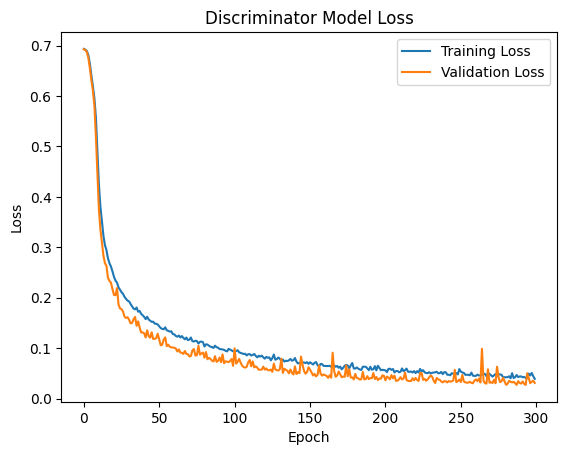

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Discriminator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
max_epochs = 4
learning_rate = 0.001
generator_optimizer = tf.optimizers.Adam(learning_rate)

Epoch 0 Starting
Epoch 0 DONE
Epoch 1 Starting
Epoch 1 DONE
Epoch 2 Starting
Epoch 2 DONE
Epoch 3 Starting
Epoch 3 DONE


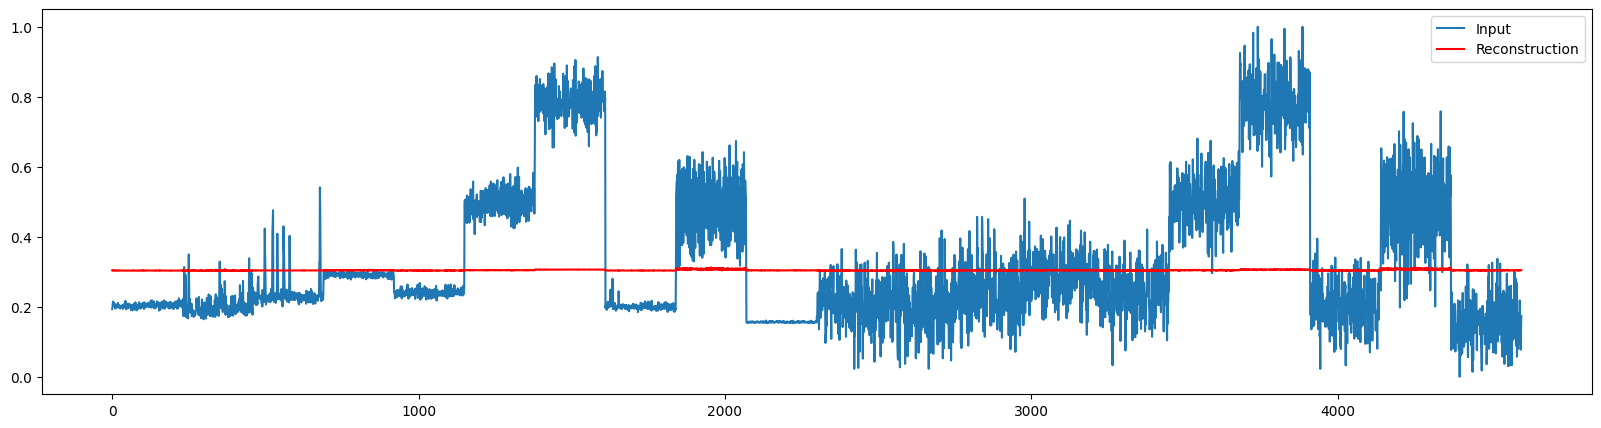

In [ ]:
step = 0
gen_losses = []
for epoch in range(max_epochs):
  print("Epoch " + str(epoch) +" Starting")

  for i in range (len(train_labels)):
    with tf.GradientTape() as gen_tape:
      output = generator(np.array([train_data[i]]))
      disc_output = discriminator(np.array(output))
      mae = tf.keras.losses.MeanAbsoluteError()
      gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
  gen_losses.append(gen_loss)
  
  print("Epoch " + str(epoch) +" DONE")

plotUsingAutoEncoder(generator,Mixed_set)

4


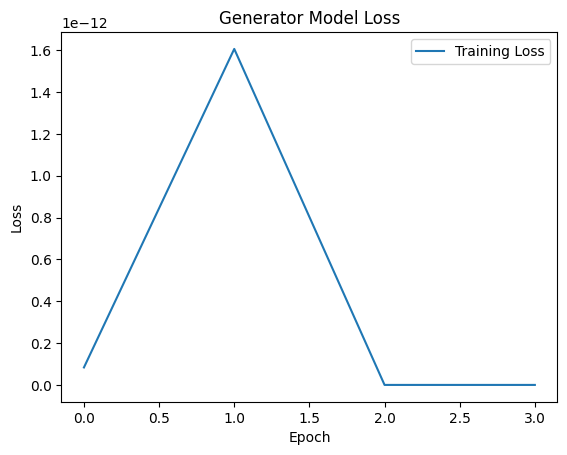

In [ ]:
plt.plot(gen_losses, label='Training Loss')
plt.title('Generator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
print(len(gen_losses))

In [ ]:
#Calculate SNR Value

noise =[]
generated = Mixed_set['separated_rms'][2300:].values.tolist()   #generated signal
original = Mixed_set['rms'][:2300].values.tolist() #original signal
mixed = Mixed_set['rms'][2300:].values.tolist() # with noise
length = len(original)
for i in range(length):
  noise.append(original[i] - mixed[i])

snr = 10 * np.log10(np.mean(np.square(generated))/np.mean(np.square(noise)))
print(snr)

13.662246708090962


#*_With 1D 2 CNN Layers & 2 Dense Layer - Leaky ReLU activation function_*



In [ ]:
from keras.layers.activation.leaky_relu import LeakyReLU
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

class Discriminator(Model):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(9,)),
        tf.keras.layers.Reshape((9, 1)),  # Add a Reshape layer to prepare input for Conv1D
        tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
        tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer 
        tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
        tf.keras.layers.Dense(5,activation='LeakyReLU'),
        tf.keras.layers.Dense(2,activation='softmax')
    ])

  def call(self, x):
    return self.model(x)

class Generator(Model):
  def __init__(self):
    super(Generator, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Reshape((9, 1)),  # Add a Reshape layer to prepare input for Conv1D
      tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation="LeakyReLU"), 
      tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
      tf.keras.layers.Flatten(), 
      tf.keras.layers.Dense(5, activation="LeakyReLU"),
      tf.keras.layers.Dense(2, activation="LeakyReLU")
      ])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(2, activation="LeakyReLU"),
      tf.keras.layers.Dense(5, activation="LeakyReLU"),
      tf.keras.layers.Dense(8, activation="LeakyReLU"),
      tf.keras.layers.Dense(9, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

generator = Generator()
discriminator = Discriminator()

generator.compile(optimizer='adam',loss = 'mae')
discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

discriminator.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = discriminator.fit(train_data, train_labels, epochs=300, validation_data=(test_data, test_labels))


Epoch 1/300
101/101 [==============================] - 1s 5ms/step - loss: 0.6931 - accuracy: 0.5081 - val_loss: 0.6934 - val_accuracy: 0.4826
Epoch 2/300
101/101 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5180 - val_loss: 0.6935 - val_accuracy: 0.4826
Epoch 3/300
101/101 [==============================] - 0s 4ms/step - loss: 0.6922 - accuracy: 0.5134 - val_loss: 0.6918 - val_accuracy: 0.4826
Epoch 4/300
101/101 [==============================] - 0s 3ms/step - loss: 0.6909 - accuracy: 0.5540 - val_loss: 0.6901 - val_accuracy: 0.4797
Epoch 5/300
101/101 [==============================] - 0s 3ms/step - loss: 0.6880 - accuracy: 0.5944 - val_loss: 0.6861 - val_accuracy: 0.4826
Epoch 6/300
101/101 [==============================] - 0s 3ms/step - loss: 0.6779 - accuracy: 0.6516 - val_loss: 0.6661 - val_accuracy: 0.7384
Epoch 7/300
101/101 [==============================] - 0s 3ms/step - loss: 0.6533 - accuracy: 0.7422 - val_loss: 0.6284 - val_accuracy: 0.8341

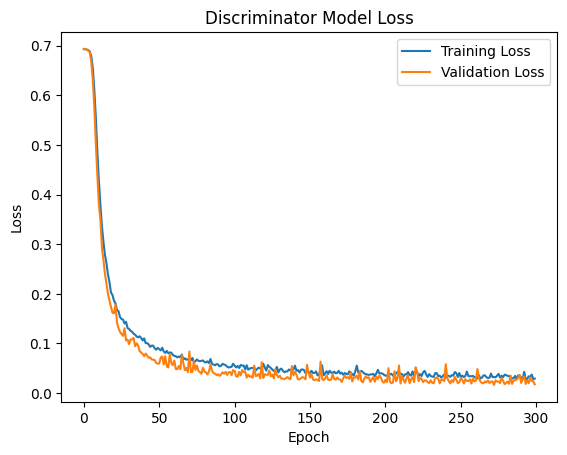

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Discriminator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
max_epochs = 4
learning_rate = 0.001
generator_optimizer = tf.optimizers.Adam(learning_rate)

Epoch 0 Starting
Epoch 0 DONE
Epoch 1 Starting
Epoch 1 DONE
Epoch 2 Starting
Epoch 2 DONE
Epoch 3 Starting
Epoch 3 DONE


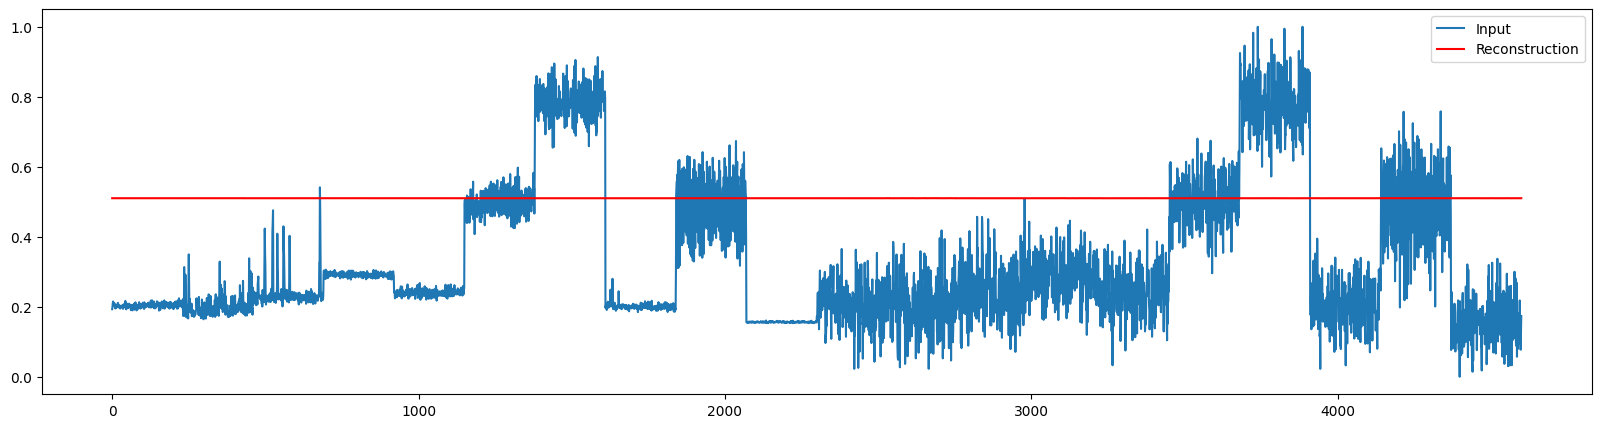

In [ ]:
step = 0
gen_losses = []
for epoch in range(max_epochs):
  print("Epoch " + str(epoch) +" Starting")

  for i in range (len(train_labels)):
    with tf.GradientTape() as gen_tape:
      output = generator(np.array([train_data[i]]))
      disc_output = discriminator(np.array(output))
      mae = tf.keras.losses.MeanAbsoluteError()
      gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
  gen_losses.append(gen_loss)
  
  print("Epoch " + str(epoch) +" DONE")

plotUsingAutoEncoder(generator,Mixed_set)

4


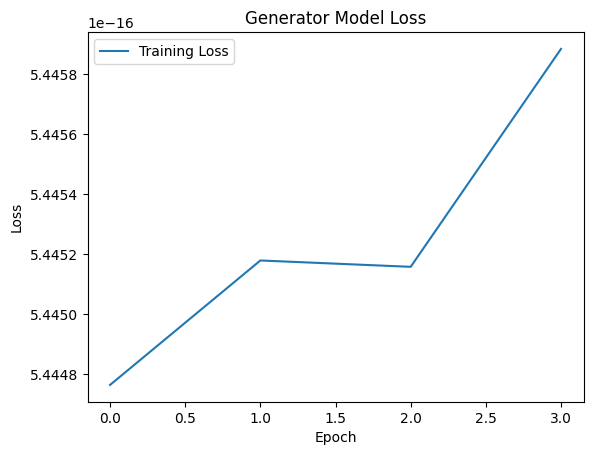

In [ ]:
plt.plot(gen_losses, label='Training Loss')
plt.title('Generator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
print(len(gen_losses))

In [ ]:
#Calculate SNR Value

noise =[]
generated = Mixed_set['separated_rms'][2300:].values.tolist()   #generated signal
original = Mixed_set['rms'][:2300].values.tolist() #original signal
mixed = Mixed_set['rms'][2300:].values.tolist() # with noise
length = len(original)
for i in range(length):
  noise.append(original[i] - mixed[i])

snr = 10 * np.log10(np.mean(np.square(generated))/np.mean(np.square(noise)))
print(snr)

17.903496710865053


#*__With 1D 3 CNN Layers & 1 Dense Layer - Leaky ReLU activation function__*



In [ ]:
from keras.layers.activation.leaky_relu import LeakyReLU
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

class Discriminator(Model):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(9,)),
        tf.keras.layers.Reshape((9, 1)),  # Add a Reshape layer to prepare input for Conv1D
        tf.keras.layers.Conv1D(filters=9, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
        tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer
        tf.keras.layers.Conv1D(filters=6, kernel_size=3, activation="LeakyReLU"), 
        tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
        tf.keras.layers.Dense(2,activation='softmax')
    ])

  def call(self, x):
    return self.model(x)

class Generator(Model):
  def __init__(self):
    super(Generator, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Reshape((9, 1)),  # Add a Reshape layer to prepare input for Conv1D
      tf.keras.layers.Conv1D(filters=9, kernel_size=3, activation="LeakyReLU"), 
      tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
      tf.keras.layers.Conv1D(filters=6, kernel_size=3, activation="LeakyReLU"),
      tf.keras.layers.Flatten(), 
      tf.keras.layers.Dense(2, activation="LeakyReLU")
      ])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(2, activation="LeakyReLU"),
      tf.keras.layers.Dense(6, activation="LeakyReLU"),
      tf.keras.layers.Dense(8, activation="LeakyReLU"),
      tf.keras.layers.Dense(9, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

generator = Generator()
discriminator = Discriminator()

generator.compile(optimizer='adam',loss = 'mae')
discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

discriminator.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = discriminator.fit(train_data, train_labels, epochs=300, validation_data=(test_data, test_labels))


Epoch 1/300
101/101 [==============================] - 1s 4ms/step - loss: 0.6923 - accuracy: 0.4789 - val_loss: 0.6919 - val_accuracy: 0.4326
Epoch 2/300
101/101 [==============================] - 0s 3ms/step - loss: 0.6915 - accuracy: 0.5099 - val_loss: 0.6902 - val_accuracy: 0.3855
Epoch 3/300
101/101 [==============================] - 0s 3ms/step - loss: 0.6887 - accuracy: 0.4997 - val_loss: 0.6873 - val_accuracy: 0.5768
Epoch 4/300
101/101 [==============================] - 0s 3ms/step - loss: 0.6844 - accuracy: 0.5270 - val_loss: 0.6807 - val_accuracy: 0.6196
Epoch 5/300
101/101 [==============================] - 0s 3ms/step - loss: 0.6763 - accuracy: 0.5522 - val_loss: 0.6705 - val_accuracy: 0.6558
Epoch 6/300
101/101 [==============================] - 0s 3ms/step - loss: 0.6660 - accuracy: 0.5957 - val_loss: 0.6588 - val_accuracy: 0.6471
Epoch 7/300
101/101 [==============================] - 0s 3ms/step - loss: 0.6514 - accuracy: 0.6220 - val_loss: 0.6442 - val_accuracy: 0.6261

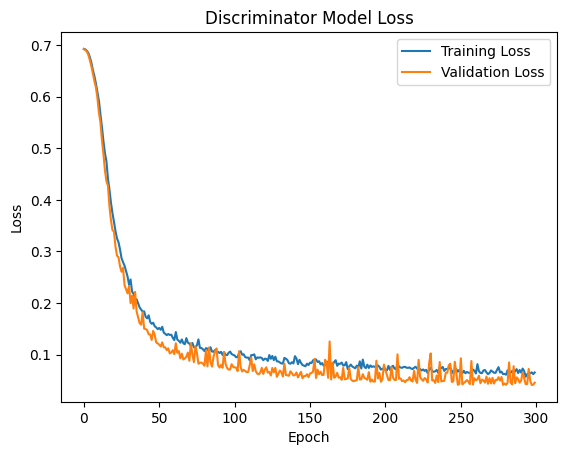

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Discriminator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
max_epochs = 4
learning_rate = 0.001
generator_optimizer = tf.optimizers.Adam(learning_rate)

Epoch 0 Starting
Epoch 0 DONE
Epoch 1 Starting
Epoch 1 DONE
Epoch 2 Starting
Epoch 2 DONE
Epoch 3 Starting
Epoch 3 DONE


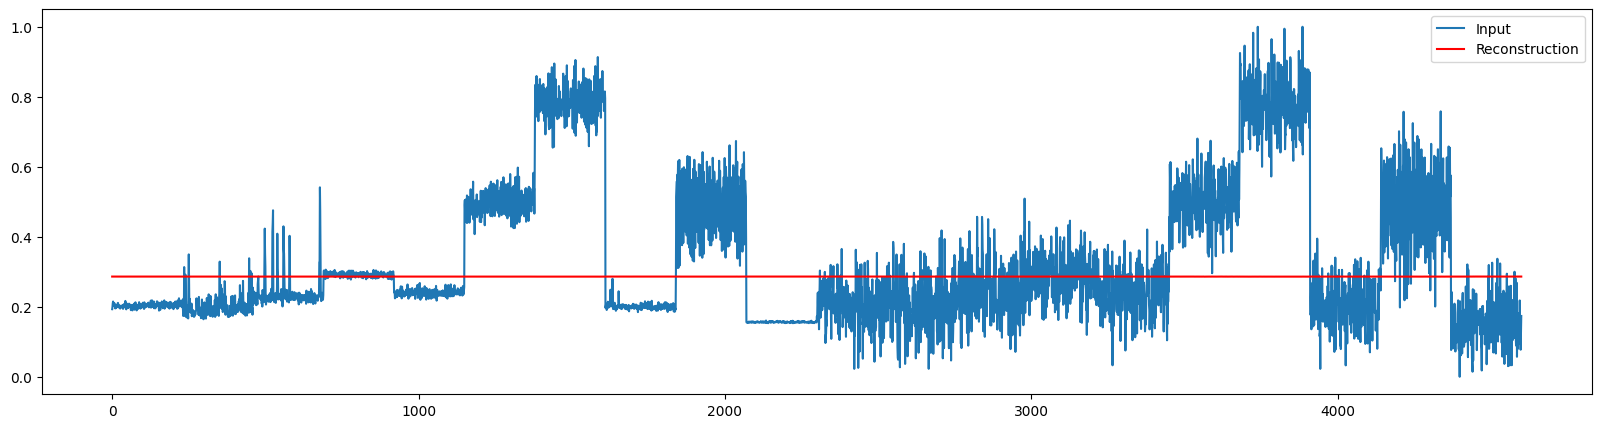

In [ ]:
step = 0
gen_losses = []
for epoch in range(max_epochs):
  print("Epoch " + str(epoch) +" Starting")

  for i in range (len(train_labels)):
    with tf.GradientTape() as gen_tape:
      output = generator(np.array([train_data[i]]))
      disc_output = discriminator(np.array(output))
      mae = tf.keras.losses.MeanAbsoluteError()
      gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
  gen_losses.append(gen_loss)
  
  print("Epoch " + str(epoch) +" DONE")

plotUsingAutoEncoder(generator,Mixed_set)

4


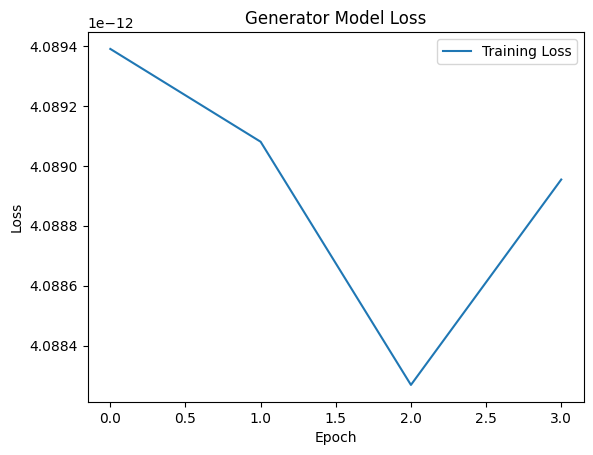

In [ ]:
plt.plot(gen_losses, label='Training Loss')
plt.title('Generator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
print(len(gen_losses))

In [ ]:
#Calculate SNR Value

noise =[]
generated = Mixed_set['separated_rms'][2300:].values.tolist()   #generated signal
original = Mixed_set['rms'][:2300].values.tolist() #original signal
mixed = Mixed_set['rms'][2300:].values.tolist() # with noise
length = len(original)
for i in range(length):
  noise.append(original[i] - mixed[i])

snr = 10 * np.log10(np.mean(np.square(generated))/np.mean(np.square(noise)))
print(snr)

13.16811263975662


#*__With 1D 3 CNN Layers & 1 Dense Layer - Leaky ReLU activation function__*



In [18]:
from keras.layers.activation.leaky_relu import LeakyReLU
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

class Discriminator(Model):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(9,)),
        tf.keras.layers.Reshape((9, 1)),  # Add a Reshape layer to prepare input for Conv1D
        tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
        tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer
        tf.keras.layers.Conv1D(filters=5, kernel_size=3, activation="LeakyReLU"), 
        tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
        tf.keras.layers.Dense(2,activation='softmax')
    ])

  def call(self, x):
    return self.model(x)

class Generator(Model):
  def __init__(self):
    super(Generator, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Reshape((9, 1)),  # Add a Reshape layer to prepare input for Conv1D
      tf.keras.layers.Conv1D(filters=9, kernel_size=3, activation="LeakyReLU"), 
      tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
      tf.keras.layers.Conv1D(filters=6, kernel_size=3, activation="LeakyReLU"),
      tf.keras.layers.Flatten(), 
      tf.keras.layers.Dense(2, activation="LeakyReLU")
      ])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(2, activation="LeakyReLU"),
      tf.keras.layers.Dense(6, activation="LeakyReLU"),
      tf.keras.layers.Dense(8, activation="LeakyReLU"),
      tf.keras.layers.Dense(9, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

generator = Generator()
discriminator = Discriminator()

generator.compile(optimizer='adam',loss = 'mae')
discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

discriminator.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = discriminator.fit(train_data, train_labels, epochs=300, validation_data=(test_data, test_labels))


Epoch 1/300
101/101 [==============================] - 4s 11ms/step - loss: 0.6931 - accuracy: 0.5047 - val_loss: 0.6930 - val_accuracy: 0.4268
Epoch 2/300
101/101 [==============================] - 0s 4ms/step - loss: 0.6923 - accuracy: 0.5006 - val_loss: 0.6930 - val_accuracy: 0.4819
Epoch 3/300
101/101 [==============================] - 0s 4ms/step - loss: 0.6909 - accuracy: 0.5087 - val_loss: 0.6907 - val_accuracy: 0.4210
Epoch 4/300
101/101 [==============================] - 1s 6ms/step - loss: 0.6862 - accuracy: 0.5385 - val_loss: 0.6817 - val_accuracy: 0.6819
Epoch 5/300
101/101 [==============================] - 1s 8ms/step - loss: 0.6697 - accuracy: 0.6680 - val_loss: 0.6692 - val_accuracy: 0.4413
Epoch 6/300
101/101 [==============================] - 1s 7ms/step - loss: 0.6288 - accuracy: 0.7155 - val_loss: 0.6033 - val_accuracy: 0.7855
Epoch 7/300
101/101 [==============================] - 1s 12ms/step - loss: 0.5728 - accuracy: 0.7727 - val_loss: 0.5449 - val_accuracy: 0.79

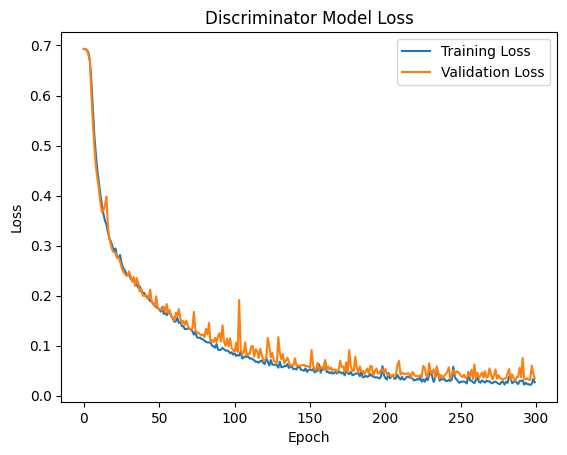

In [19]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Discriminator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [20]:
max_epochs = 4
learning_rate = 0.001
generator_optimizer = tf.optimizers.Adam(learning_rate)

Epoch 0 Starting
Epoch 0 DONE
Epoch 1 Starting
Epoch 1 DONE
Epoch 2 Starting
Epoch 2 DONE
Epoch 3 Starting
Epoch 3 DONE


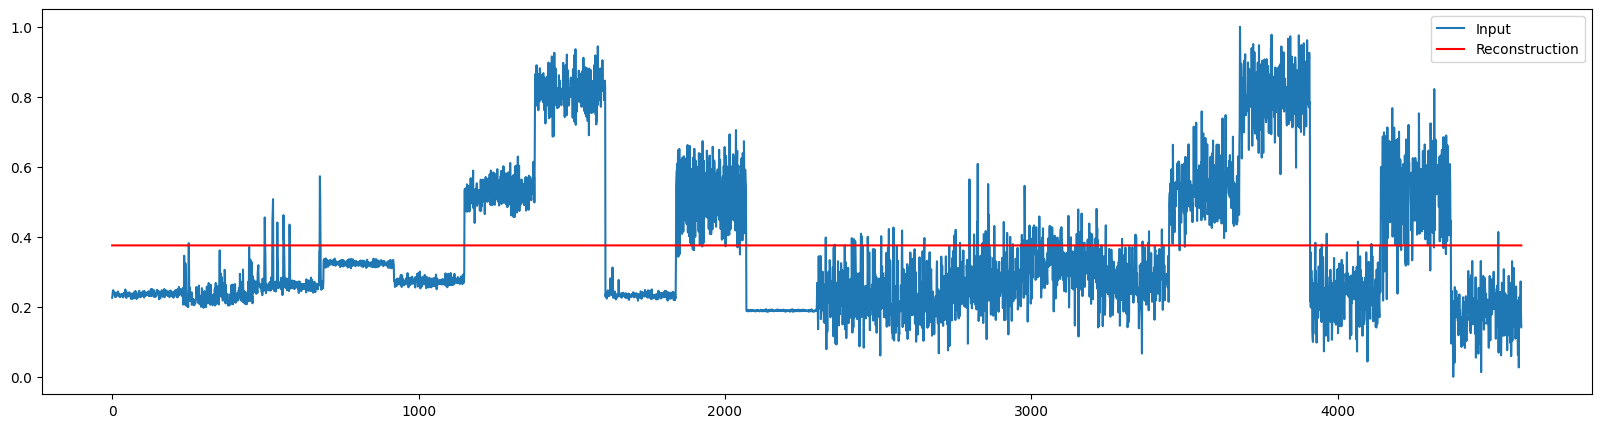

In [21]:
step = 0
gen_losses = []
for epoch in range(max_epochs):
  print("Epoch " + str(epoch) +" Starting")

  for i in range (len(train_labels)):
    with tf.GradientTape() as gen_tape:
      output = generator(np.array([train_data[i]]))
      disc_output = discriminator(np.array(output))
      mae = tf.keras.losses.MeanAbsoluteError()
      gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
  gen_losses.append(gen_loss)
  
  print("Epoch " + str(epoch) +" DONE")

plotUsingAutoEncoder(generator,Mixed_set)

4


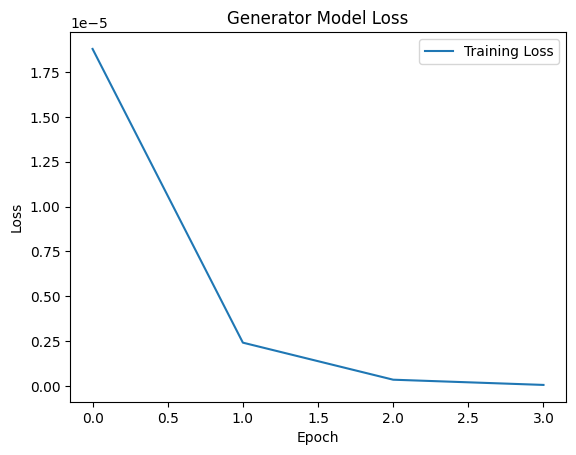

In [22]:
plt.plot(gen_losses, label='Training Loss')
plt.title('Generator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
print(len(gen_losses))

In [23]:
#Calculate SNR Value

noise =[]
generated = Mixed_set['separated_rms'][2300:].values.tolist()   #generated signal
original = Mixed_set['rms'][:2300].values.tolist() #original signal
mixed = Mixed_set['rms'][2300:].values.tolist() # with noise
length = len(original)
for i in range(length):
  noise.append(original[i] - mixed[i])

snr = 10 * np.log10(np.mean(np.square(generated))/np.mean(np.square(noise)))
print(snr)

15.480267678298276


#*_With 1D 4 CNN Layers - Leaky ReLU activation function_*



In [24]:
from keras.layers.activation.leaky_relu import LeakyReLU
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

class Discriminator(Model):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(9,)),
        tf.keras.layers.Reshape((9, 1)),  # Add a Reshape layer to prepare input for Conv1D
        tf.keras.layers.Conv1D(filters=9, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
        tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer
        tf.keras.layers.Conv1D(filters=5, kernel_size=3, activation="LeakyReLU"), 
        tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
        tf.keras.layers.Dense(3,activation='LeakyReLU'),
        tf.keras.layers.Dense(2,activation='softmax')
    ])

  def call(self, x):
    return self.model(x)

class Generator(Model):
  def __init__(self):
    super(Generator, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Reshape((9, 1)),  # Add a Reshape layer to prepare input for Conv1D
      tf.keras.layers.Conv1D(filters=9, kernel_size=3, activation="LeakyReLU"), 
      tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
      tf.keras.layers.Conv1D(filters=5, kernel_size=3, activation="LeakyReLU"),
      tf.keras.layers.Flatten(), 
      tf.keras.layers.Dense(3, activation="LeakyReLU"),
      tf.keras.layers.Dense(2, activation="LeakyReLU")
      ])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(2, activation="LeakyReLU"),
      tf.keras.layers.Dense(3, activation="LeakyReLU"),
      tf.keras.layers.Dense(5, activation="LeakyReLU"),
      tf.keras.layers.Dense(8, activation="LeakyReLU"),
      tf.keras.layers.Dense(9, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

generator = Generator()
discriminator = Discriminator()

generator.compile(optimizer='adam',loss = 'mae')
discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

discriminator.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = discriminator.fit(train_data, train_labels, epochs=300, validation_data=(test_data, test_labels))


Epoch 1/300
101/101 [==============================] - 2s 5ms/step - loss: 0.6932 - accuracy: 0.5037 - val_loss: 0.6933 - val_accuracy: 0.4826
Epoch 2/300
101/101 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5078 - val_loss: 0.6934 - val_accuracy: 0.4826
Epoch 3/300
101/101 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5068 - val_loss: 0.6930 - val_accuracy: 0.4826
Epoch 4/300
101/101 [==============================] - 0s 4ms/step - loss: 0.6914 - accuracy: 0.5435 - val_loss: 0.6921 - val_accuracy: 0.4514
Epoch 5/300
101/101 [==============================] - 0s 4ms/step - loss: 0.6825 - accuracy: 0.6376 - val_loss: 0.6726 - val_accuracy: 0.7225
Epoch 6/300
101/101 [==============================] - 0s 3ms/step - loss: 0.6330 - accuracy: 0.7509 - val_loss: 0.5880 - val_accuracy: 0.7688
Epoch 7/300
101/101 [==============================] - 0s 4ms/step - loss: 0.5250 - accuracy: 0.8149 - val_loss: 0.4737 - val_accuracy: 0.8413

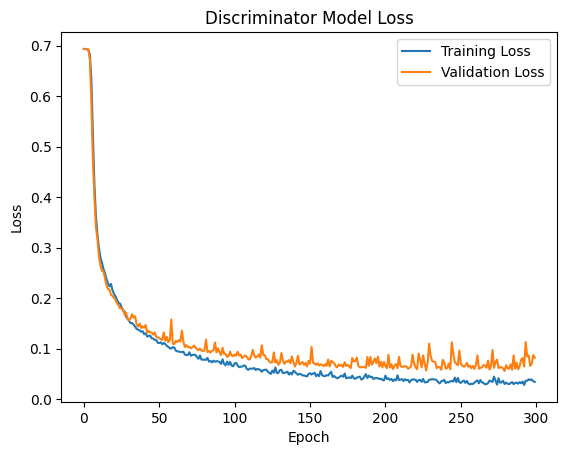

In [25]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Discriminator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [26]:
max_epochs = 4
learning_rate = 0.001
generator_optimizer = tf.optimizers.Adam(learning_rate)

Epoch 0 Starting
Epoch 0 DONE
Epoch 1 Starting
Epoch 1 DONE
Epoch 2 Starting
Epoch 2 DONE
Epoch 3 Starting
Epoch 3 DONE


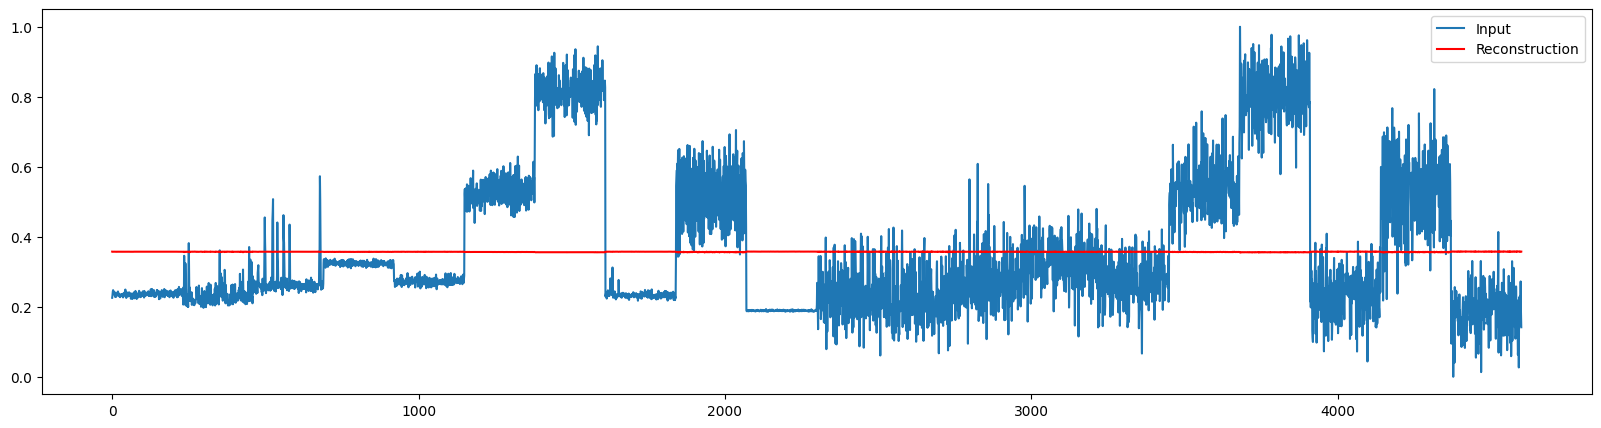

In [27]:
step = 0
gen_losses = []
for epoch in range(max_epochs):
  print("Epoch " + str(epoch) +" Starting")

  for i in range (len(train_labels)):
    with tf.GradientTape() as gen_tape:
      output = generator(np.array([train_data[i]]))
      disc_output = discriminator(np.array(output))
      mae = tf.keras.losses.MeanAbsoluteError()
      gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
  gen_losses.append(gen_loss)
  
  print("Epoch " + str(epoch) +" DONE")

plotUsingAutoEncoder(generator,Mixed_set)

4


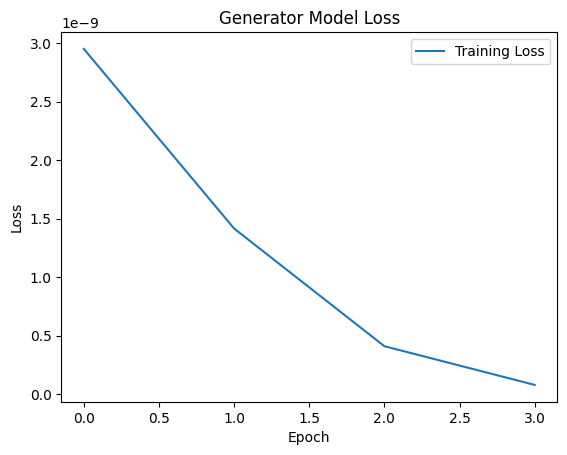

In [28]:
plt.plot(gen_losses, label='Training Loss')
plt.title('Generator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
print(len(gen_losses))

In [29]:
#Calculate SNR Value

noise =[]
generated = Mixed_set['separated_rms'][2300:].values.tolist()   #generated signal
original = Mixed_set['rms'][:2300].values.tolist() #original signal
mixed = Mixed_set['rms'][2300:].values.tolist() # with noise
length = len(original)
for i in range(length):
  noise.append(original[i] - mixed[i])

snr = 10 * np.log10(np.mean(np.square(generated))/np.mean(np.square(noise)))
print(snr)

15.329938480256455


#*__With 1D 3 CNN Layers & 2 Dense Layer - Leaky ReLU activation function__*



In [30]:
from keras.layers.activation.leaky_relu import LeakyReLU
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

class Discriminator(Model):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(9,)),
        tf.keras.layers.Reshape((9, 1)),  # Add a Reshape layer to prepare input for Conv1D
        tf.keras.layers.Conv1D(filters=20, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
        tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer
        tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="LeakyReLU"), 
        tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
        tf.keras.layers.Dense(5,activation='LeakyReLU'),
        tf.keras.layers.Dense(2,activation='softmax')
    ])

  def call(self, x):
    return self.model(x)

class Generator(Model):
  def __init__(self):
    super(Generator, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Reshape((9, 1)),  # Add a Reshape layer to prepare input for Conv1D
      tf.keras.layers.Conv1D(filters=20, kernel_size=3, activation="LeakyReLU"), 
      tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
      tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="LeakyReLU"),
      tf.keras.layers.Flatten(), 
      tf.keras.layers.Dense(5, activation="LeakyReLU"),
      tf.keras.layers.Dense(2, activation="LeakyReLU")
      ])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(2, activation="LeakyReLU"),
      tf.keras.layers.Dense(5, activation="LeakyReLU"),
      tf.keras.layers.Dense(6, activation="LeakyReLU"),
      tf.keras.layers.Dense(8, activation="LeakyReLU"),
      tf.keras.layers.Dense(9, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

generator = Generator()
discriminator = Discriminator()

generator.compile(optimizer='adam',loss = 'mae')
discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

discriminator.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = discriminator.fit(train_data, train_labels, epochs=300, validation_data=(test_data, test_labels))


Epoch 1/300
101/101 [==============================] - 2s 5ms/step - loss: 0.6928 - accuracy: 0.4851 - val_loss: 0.6925 - val_accuracy: 0.4826
Epoch 2/300
101/101 [==============================] - 0s 3ms/step - loss: 0.6907 - accuracy: 0.4870 - val_loss: 0.6881 - val_accuracy: 0.4725
Epoch 3/300
101/101 [==============================] - 0s 4ms/step - loss: 0.6836 - accuracy: 0.4553 - val_loss: 0.6715 - val_accuracy: 0.4580
Epoch 4/300
101/101 [==============================] - 1s 6ms/step - loss: 0.6535 - accuracy: 0.5478 - val_loss: 0.6358 - val_accuracy: 0.6688
Epoch 5/300
101/101 [==============================] - 0s 5ms/step - loss: 0.5659 - accuracy: 0.7059 - val_loss: 0.4825 - val_accuracy: 0.7746
Epoch 6/300
101/101 [==============================] - 0s 5ms/step - loss: 0.4238 - accuracy: 0.8196 - val_loss: 0.3387 - val_accuracy: 0.8848
Epoch 7/300
101/101 [==============================] - 0s 5ms/step - loss: 0.3075 - accuracy: 0.8835 - val_loss: 0.2474 - val_accuracy: 0.9217

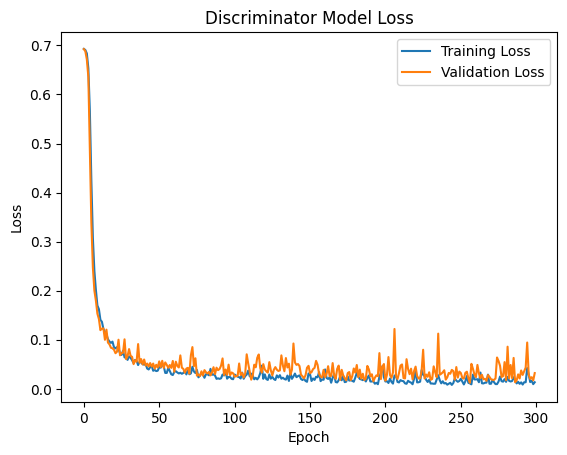

In [31]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Discriminator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [32]:
max_epochs = 4
learning_rate = 0.001
generator_optimizer = tf.optimizers.Adam(learning_rate)

Epoch 0 Starting
Epoch 0 DONE
Epoch 1 Starting
Epoch 1 DONE
Epoch 2 Starting
Epoch 2 DONE
Epoch 3 Starting
Epoch 3 DONE


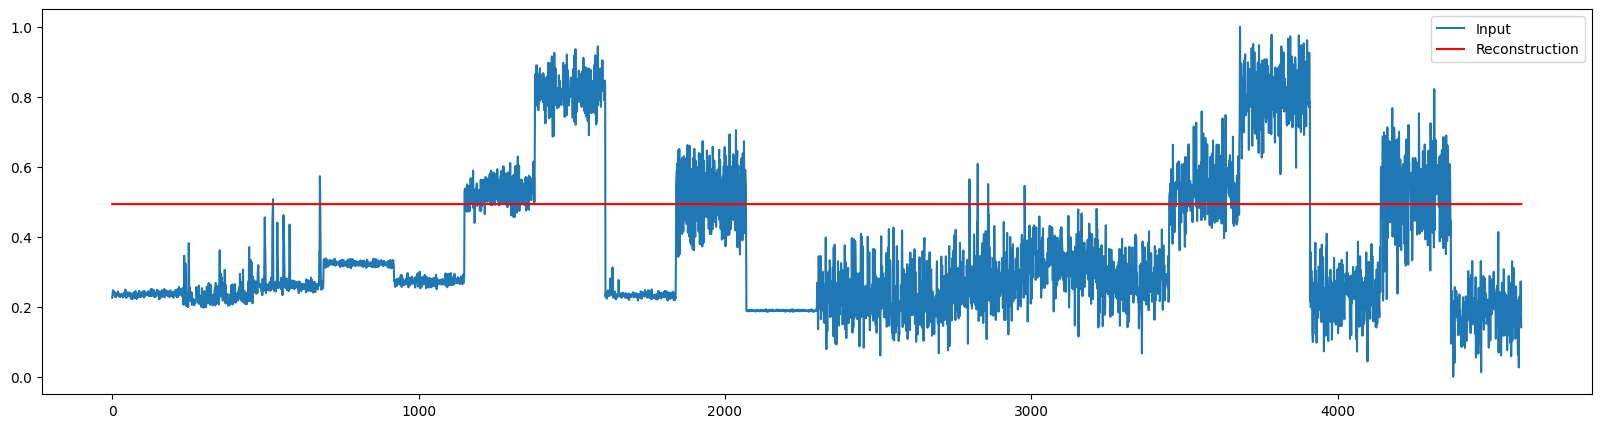

In [33]:
step = 0
gen_losses = []
for epoch in range(max_epochs):
  print("Epoch " + str(epoch) +" Starting")

  for i in range (len(train_labels)):
    with tf.GradientTape() as gen_tape:
      output = generator(np.array([train_data[i]]))
      disc_output = discriminator(np.array(output))
      mae = tf.keras.losses.MeanAbsoluteError()
      gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
  gen_losses.append(gen_loss)
  
  print("Epoch " + str(epoch) +" DONE")

plotUsingAutoEncoder(generator,Mixed_set)

4


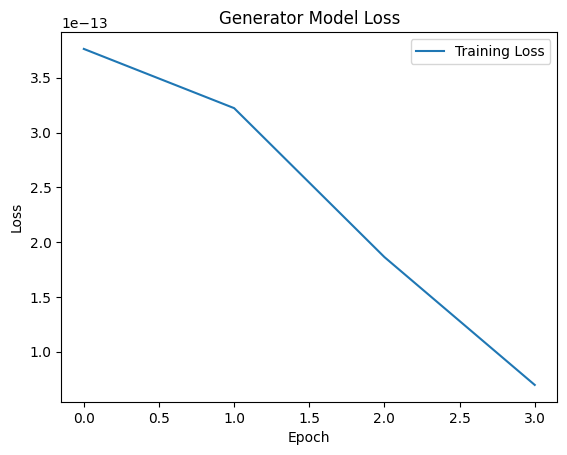

In [34]:
plt.plot(gen_losses, label='Training Loss')
plt.title('Generator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
print(len(gen_losses))

In [35]:
#Calculate SNR Value

noise =[]
generated = Mixed_set['separated_rms'][2300:].values.tolist()   #generated signal
original = Mixed_set['rms'][:2300].values.tolist() #original signal
mixed = Mixed_set['rms'][2300:].values.tolist() # with noise
length = len(original)
for i in range(length):
  noise.append(original[i] - mixed[i])

snr = 10 * np.log10(np.mean(np.square(generated))/np.mean(np.square(noise)))
print(snr)

17.824723534173618


#*__With 1D 4 CNN Layers & 1 Dense Layer - Leaky ReLU activation function__*



In [36]:
from keras.layers.activation.leaky_relu import LeakyReLU
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

class Discriminator(Model):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(9,)),
        tf.keras.layers.Reshape((9, 1)),  # Add a Reshape layer to prepare input for Conv1D
        tf.keras.layers.Conv1D(filters=9, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
        tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer
        tf.keras.layers.Conv1D(filters=5, kernel_size=3, activation="LeakyReLU"), 
        tf.keras.layers.Conv1D(filters=3, kernel_size=3, activation="LeakyReLU"), 
        tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
        tf.keras.layers.Dense(2,activation='softmax')
    ])

  def call(self, x):
    return self.model(x)

class Generator(Model):
  def __init__(self):
    super(Generator, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Reshape((9, 1)),  # Add a Reshape layer to prepare input for Conv1D
      tf.keras.layers.Conv1D(filters=9, kernel_size=3, activation="LeakyReLU"), 
      tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
      tf.keras.layers.Conv1D(filters=5, kernel_size=3, activation="LeakyReLU"),
      tf.keras.layers.Conv1D(filters=3, kernel_size=3, activation="LeakyReLU"),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(2, activation="LeakyReLU")
      ])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(2, activation="LeakyReLU"),
      tf.keras.layers.Dense(3, activation="LeakyReLU"),
      tf.keras.layers.Dense(5, activation="LeakyReLU"),
      tf.keras.layers.Dense(8, activation="LeakyReLU"),
      tf.keras.layers.Dense(9, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

generator = Generator()
discriminator = Discriminator()

generator.compile(optimizer='adam',loss = 'mae')
discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

discriminator.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = discriminator.fit(train_data, train_labels, epochs=300, validation_data=(test_data, test_labels))


Epoch 1/300
101/101 [==============================] - 2s 5ms/step - loss: 0.6930 - accuracy: 0.4994 - val_loss: 0.6932 - val_accuracy: 0.4986
Epoch 2/300
101/101 [==============================] - 0s 3ms/step - loss: 0.6890 - accuracy: 0.5130 - val_loss: 0.6880 - val_accuracy: 0.4681
Epoch 3/300
101/101 [==============================] - 0s 3ms/step - loss: 0.6786 - accuracy: 0.4770 - val_loss: 0.6711 - val_accuracy: 0.4210
Epoch 4/300
101/101 [==============================] - 0s 3ms/step - loss: 0.6507 - accuracy: 0.5537 - val_loss: 0.6380 - val_accuracy: 0.6877
Epoch 5/300
101/101 [==============================] - 0s 3ms/step - loss: 0.6098 - accuracy: 0.6845 - val_loss: 0.6015 - val_accuracy: 0.7254
Epoch 6/300
101/101 [==============================] - 0s 3ms/step - loss: 0.5634 - accuracy: 0.7717 - val_loss: 0.5551 - val_accuracy: 0.8029
Epoch 7/300
101/101 [==============================] - 0s 3ms/step - loss: 0.5142 - accuracy: 0.8025 - val_loss: 0.5009 - val_accuracy: 0.8181

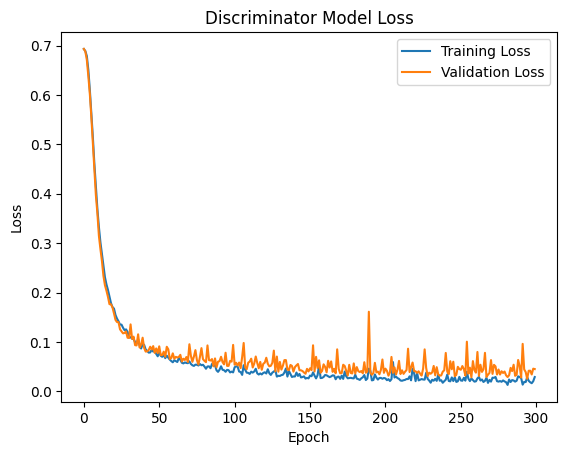

In [37]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Discriminator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [38]:
max_epochs = 4
learning_rate = 0.001
generator_optimizer = tf.optimizers.Adam(learning_rate)

Epoch 0 Starting
Epoch 0 DONE
Epoch 1 Starting
Epoch 1 DONE
Epoch 2 Starting
Epoch 2 DONE
Epoch 3 Starting
Epoch 3 DONE


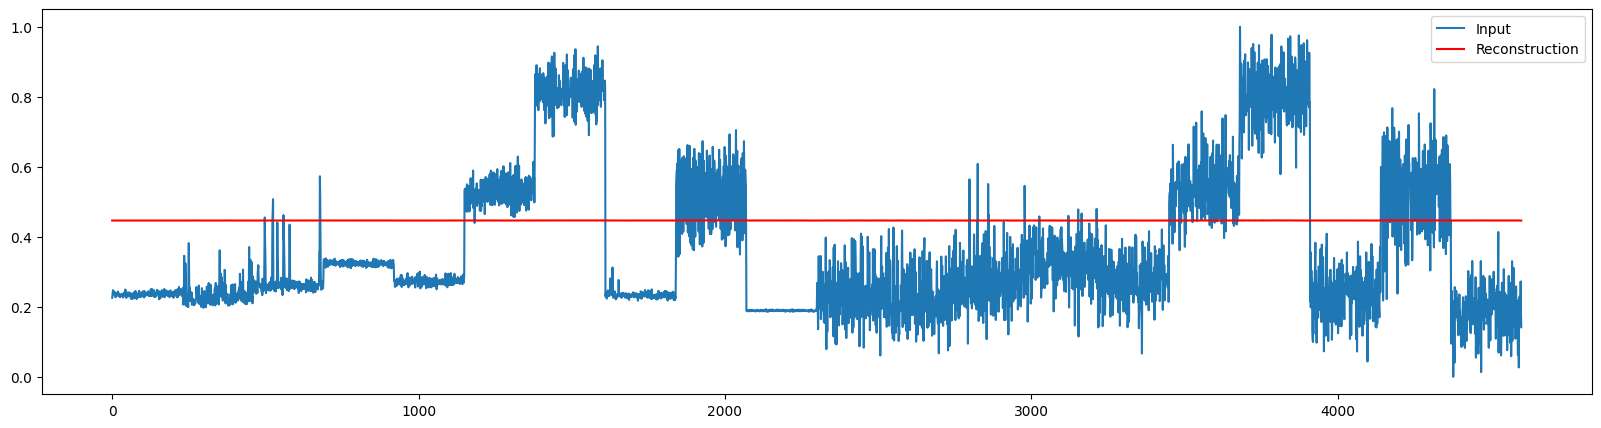

In [39]:
step = 0
gen_losses = []
for epoch in range(max_epochs):
  print("Epoch " + str(epoch) +" Starting")

  for i in range (len(train_labels)):
    with tf.GradientTape() as gen_tape:
      output = generator(np.array([train_data[i]]))
      disc_output = discriminator(np.array(output))
      mae = tf.keras.losses.MeanAbsoluteError()
      gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
  gen_losses.append(gen_loss)
  
  print("Epoch " + str(epoch) +" DONE")

plotUsingAutoEncoder(generator,Mixed_set)

4


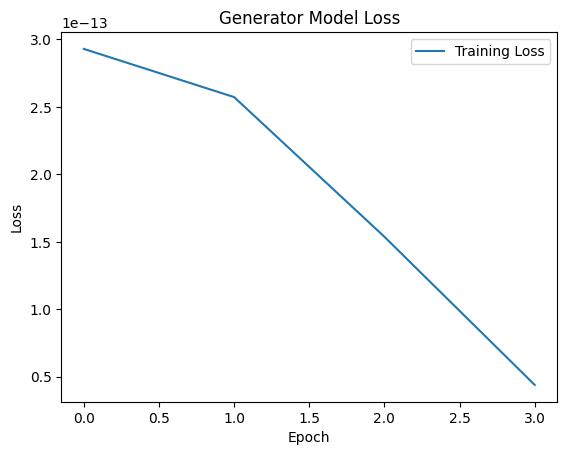

In [40]:
plt.plot(gen_losses, label='Training Loss')
plt.title('Generator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
print(len(gen_losses))

In [41]:
#Calculate SNR Value

noise =[]
generated = Mixed_set['separated_rms'][2300:].values.tolist()   #generated signal
original = Mixed_set['rms'][:2300].values.tolist() #original signal
mixed = Mixed_set['rms'][2300:].values.tolist() # with noise
length = len(original)
for i in range(length):
  noise.append(original[i] - mixed[i])

snr = 10 * np.log10(np.mean(np.square(generated))/np.mean(np.square(noise)))
print(snr)

16.936958172972698


#*__With 1D 4 CNN Layers & 1 Dense Layer - Leaky ReLU activation function__*



In [42]:
from keras.layers.activation.leaky_relu import LeakyReLU
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

class Discriminator(Model):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(9,)),
        tf.keras.layers.Reshape((9, 1)),  # Add a Reshape layer to prepare input for Conv1D
        tf.keras.layers.Conv1D(filters=20, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
        tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer
        tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="LeakyReLU"), 
        tf.keras.layers.Conv1D(filters=5, kernel_size=3, activation="LeakyReLU"), 
        tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
        tf.keras.layers.Dense(2,activation='softmax')
    ])

  def call(self, x):
    return self.model(x)

class Generator(Model):
  def __init__(self):
    super(Generator, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Reshape((9, 1)),  # Add a Reshape layer to prepare input for Conv1D
      tf.keras.layers.Conv1D(filters=20, kernel_size=3, activation="LeakyReLU"), 
      tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
      tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="LeakyReLU"),
      tf.keras.layers.Conv1D(filters=5, kernel_size=3, activation="LeakyReLU"),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(2, activation="LeakyReLU")
      ])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(2, activation="LeakyReLU"),
      tf.keras.layers.Dense(5, activation="LeakyReLU"),
      tf.keras.layers.Dense(6, activation="LeakyReLU"),
      tf.keras.layers.Dense(8, activation="LeakyReLU"),
      tf.keras.layers.Dense(9, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

generator = Generator()
discriminator = Discriminator()

generator.compile(optimizer='adam',loss = 'mae')
discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

discriminator.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = discriminator.fit(train_data, train_labels, epochs=300, validation_data=(test_data, test_labels))


Epoch 1/300
101/101 [==============================] - 2s 5ms/step - loss: 0.6920 - accuracy: 0.5168 - val_loss: 0.6932 - val_accuracy: 0.4826
Epoch 2/300
101/101 [==============================] - 0s 3ms/step - loss: 0.6885 - accuracy: 0.5540 - val_loss: 0.6847 - val_accuracy: 0.6406
Epoch 3/300
101/101 [==============================] - 0s 3ms/step - loss: 0.6729 - accuracy: 0.6292 - val_loss: 0.6488 - val_accuracy: 0.7362
Epoch 4/300
101/101 [==============================] - 0s 4ms/step - loss: 0.6013 - accuracy: 0.7550 - val_loss: 0.5386 - val_accuracy: 0.7572
Epoch 5/300
101/101 [==============================] - 0s 4ms/step - loss: 0.4572 - accuracy: 0.8242 - val_loss: 0.3753 - val_accuracy: 0.8681
Epoch 6/300
101/101 [==============================] - 0s 3ms/step - loss: 0.3538 - accuracy: 0.8634 - val_loss: 0.3089 - val_accuracy: 0.9000
Epoch 7/300
101/101 [==============================] - 0s 4ms/step - loss: 0.3027 - accuracy: 0.8829 - val_loss: 0.2735 - val_accuracy: 0.8841

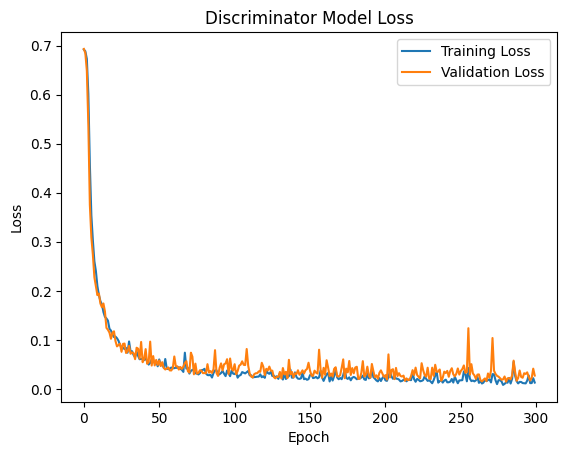

In [43]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Discriminator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [44]:
max_epochs = 4
learning_rate = 0.001
generator_optimizer = tf.optimizers.Adam(learning_rate)

Epoch 0 Starting
Epoch 0 DONE
Epoch 1 Starting
Epoch 1 DONE
Epoch 2 Starting
Epoch 2 DONE
Epoch 3 Starting
Epoch 3 DONE


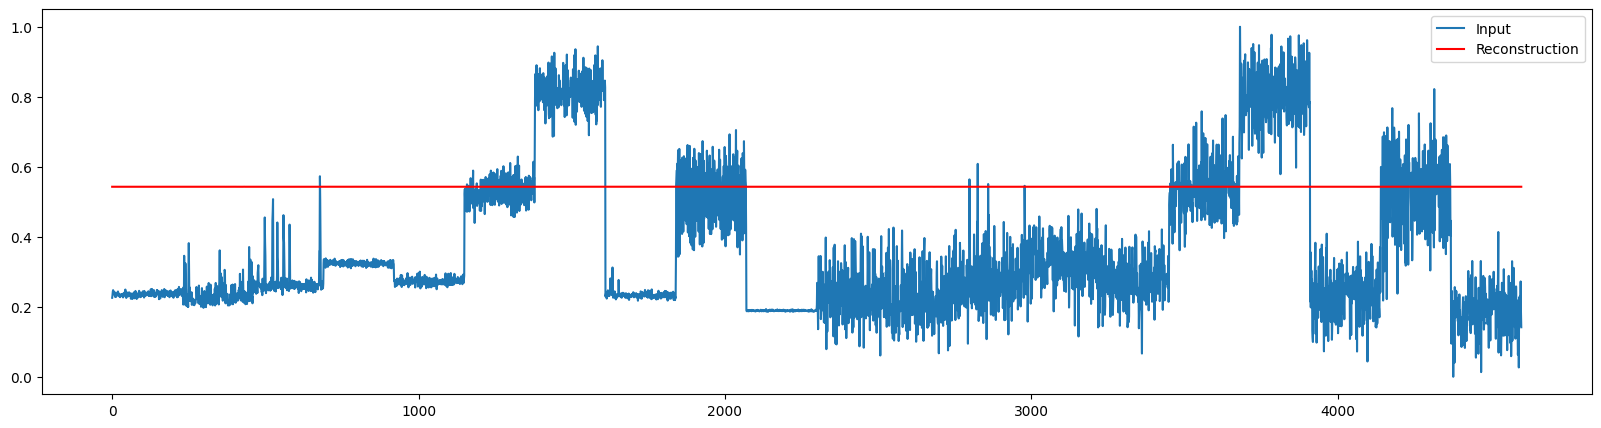

In [45]:
step = 0
gen_losses = []
for epoch in range(max_epochs):
  print("Epoch " + str(epoch) +" Starting")

  for i in range (len(train_labels)):
    with tf.GradientTape() as gen_tape:
      output = generator(np.array([train_data[i]]))
      disc_output = discriminator(np.array(output))
      mae = tf.keras.losses.MeanAbsoluteError()
      gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
  gen_losses.append(gen_loss)
  
  print("Epoch " + str(epoch) +" DONE")

plotUsingAutoEncoder(generator,Mixed_set)

4


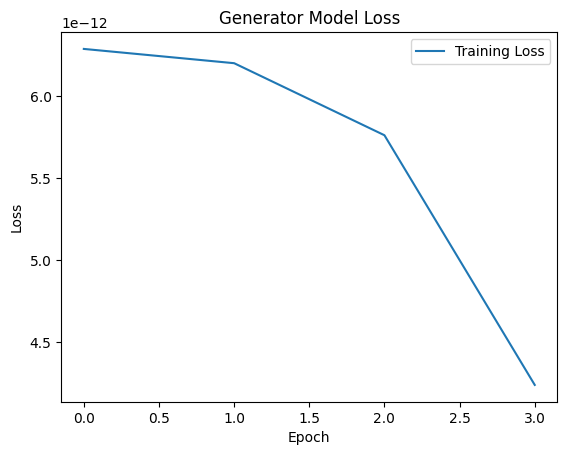

In [46]:
plt.plot(gen_losses, label='Training Loss')
plt.title('Generator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
print(len(gen_losses))

In [47]:
#Calculate SNR Value

noise =[]
generated = Mixed_set['separated_rms'][2300:].values.tolist()   #generated signal
original = Mixed_set['rms'][:2300].values.tolist() #original signal
mixed = Mixed_set['rms'][2300:].values.tolist() # with noise
length = len(original)
for i in range(length):
  noise.append(original[i] - mixed[i])

snr = 10 * np.log10(np.mean(np.square(generated))/np.mean(np.square(noise)))
print(snr)

18.62979598573733
